In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras

In [2]:
data_string = """
10.0,5.5,68.0
11.0,6.5,69.5
7.5,5.0,63.0
8.5,4.5,64.0
9.0,5.0,67.0
11.5,6.0,71.0
10,5.0,69
9.5,6.0,67
8.0,4.0,66
10.5,7.0,70
"""
data = [item.split(',') for item in data_string.strip().split('\n')]
data = np.array(data).astype(np.float)
X = data[:,0:2]
X = np.c_[np.ones(X.shape[0]), X]
Y = data[:,2].reshape(10,1)
print(X)
print(Y)

[[ 1.  10.   5.5]
 [ 1.  11.   6.5]
 [ 1.   7.5  5. ]
 [ 1.   8.5  4.5]
 [ 1.   9.   5. ]
 [ 1.  11.5  6. ]
 [ 1.  10.   5. ]
 [ 1.   9.5  6. ]
 [ 1.   8.   4. ]
 [ 1.  10.5  7. ]]
[[68. ]
 [69.5]
 [63. ]
 [64. ]
 [67. ]
 [71. ]
 [69. ]
 [67. ]
 [66. ]
 [70. ]]


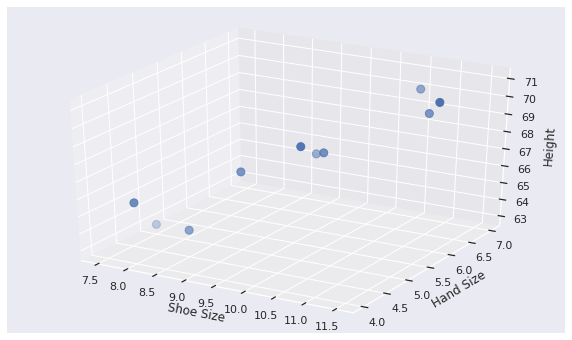

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], s=64)
ax.set_xlabel('Shoe Size')
ax.set_ylabel('Hand Size')
ax.set_zlabel('Height')
plt.show()

\begin{align}
\hat{Y} = XW^T =
\begin{pmatrix}
x_{0,0} & x_{0,1} \\
x_{1,0} & x_{1,1} \\
\vdots & \vdots \\
x_{m-1,0} & x_{m-1,1} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\end{pmatrix}
\end{align}

\begin{align}
\hat{Y} = XW^T =
\begin{pmatrix}
1.0 & 10.0 \\
1.0 & 11.0 \\
1.0 & 7.5 \\
1.0 & 8.5 \\
1.0 & 9.0 \\
1.0 & 11.5 \\
1.0 & 10.0 \\
1.0 & 9.5 \\
1.0 & 8.0 \\
1.0 & 10.5 \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\end{pmatrix}
\end{align}

\begin{align}
f(x) = w_0 + w_1x_1 + w_2x_2
\end{align}

\begin{align}
\hat{Y} = XW^T =
\begin{pmatrix}
1.0 & 10.0 & 5.5 \\
1.0 & 11.0 & 6.5 \\
1.0 & 7.5 & 5.0 \\
1.0 & 8.5 & 4.5 \\
1.0 & 9.0 & 5.0 \\
1.0 & 11.5 & 6.0 \\
1.0 & 10.0 & 5.0 \\
1.0 & 9.5 & 6.0 \\
1.0 & 8.0 & 4.0 \\
1.0 & 10.5 & 7.0 \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\end{pmatrix}
\end{align}

\begin{align}
f(x) = w_0x_0 + w_1x_1 + w_2x_2 + \dots + w_{n-1}x_{n-1}
\end{align}

\begin{align}
\hat{Y} = XW^T =
\begin{pmatrix}
x_{0,0} & x_{0,1} & \dots & x_{0,n-1} \\
x_{1,0} & x_{1,1} & \dots & x_{1,n-1} \\
\vdots & \vdots & & \vdots \\
x_{m-1,0} & x_{m-1,1} & \dots & x_{m-1,n-1} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\vdots \\
w_{n-1}
\end{pmatrix}
\end{align}

\begin{align}
XW^T \\
XW^T - Y \\
\frac{1}{m}(XW^T - Y)X \\
\end{align}

In [7]:
# Provide the names for the feature columns since the CSV file with the data
# does not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
car_data = pd.read_csv(
    'https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
    sep=',', names=cols, header=None, encoding='latin-1')

# We want to shuffle the order of the rows without touching the columns.
# First, we get a list of indices corresponding to the rows.
indices = np.arange(car_data.shape[0])

# Next, we shuffle the indices using np.random.permutation but set a random seed
# so that everyone gets the same results each time.
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)

# Finally, we use dataframe.reindex to change the ordering of the original
# dataframe.
car_data = car_data.reindex(shuffled_indices)

# Choose a subset of columns (these are all numeric).
columns = ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
car_data = car_data[columns]
display(car_data)

# Convert strings to numeric values, coercing missing values to nan.
for column in columns:
  car_data[column] = pd.to_numeric(car_data[column], errors='coerce')

# The dropna function drops rows with missing value(s) by default.
car_data = car_data.dropna()

# This leaves us with 199 examples.
display(car_data)

,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,68,5000,31,38,6795
181,156,5200,19,24,15750
5,110,5500,19,25,15250
18,48,5100,47,53,5151
188,100,5500,26,32,9995
...,...,...,...,...,...
67,123,4350,22,25,25552
192,68,4500,33,38,13845
117,142,5600,18,24,18150
47,176,4750,15,19,32250


,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,68.0,5000.0,31,38,6795.0
181,156.0,5200.0,19,24,15750.0
5,110.0,5500.0,19,25,15250.0
18,48.0,5100.0,47,53,5151.0
188,100.0,5500.0,26,32,9995.0
...,...,...,...,...,...
67,123.0,4350.0,22,25,25552.0
192,68.0,4500.0,33,38,13845.0
117,142.0,5600.0,18,24,18150.0
47,176.0,4750.0,15,19,32250.0


,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,103.396985,5117.587940,25.201005,30.683417,13243.432161
std,37.553843,480.521824,6.451826,6.849410,7978.707609
min,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,262.000000,6600.000000,49.000000,54.000000,45400.000000


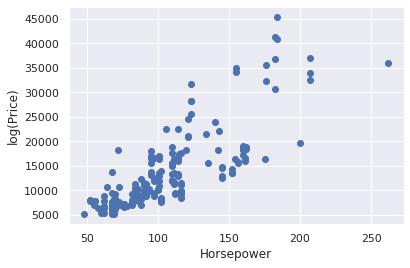

In [5]:
x = np.array(car_data['horsepower'])
y = np.array(car_data['price'])
plt.scatter(x, y)
plt.xlabel('Horsepower')
plt.ylabel('log(Price)')
plt.show()